In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../Data/ttc_subway_delay_2018_2019_for_machine_learning.csv')
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,7601,2018-02-13,6:57,Tuesday,BROADVIEW STATION,EUNT,2,4,W,BD,5285,Equipment - No Trouble Found,43.676944,-79.358333,Bloor Danforth,February,5-9AM,2,6,2018
1,3102,2019-06-12,11:54,Wednesday,COXWELL STATION,TUNIP,2,5,W,BD,5350,Operator Not In Position,43.684167,-79.323056,Bloor Danforth,June,9AM-12PM,6,11,2019
2,10917,2018-07-31,17:05,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018
3,10918,2018-07-31,17:33,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018
4,10919,2018-07-31,17:40,Tuesday,COXWELL STATION,TUNOA,2,4,W,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018


In [16]:
df.columns

Index(['id', 'date', 'time', 'day', 'station', 'code', 'min_delay', 'min_gap',
       'bound', 'line', 'vehicle', 'code_info', 'latitude', 'longitude',
       'line_name', 'month', 'time_range', 'month_number', 'hour', 'year'],
      dtype='object')

In [17]:
df_selected = df[["station","bound","line","month_number","hour","year"]]
#df_selected = df[["station","bound","day","hour"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","month_number","hour"]]
df_selected.head()

,station,bound,line,month_number,hour,year
0,BROADVIEW STATION,W,BD,2,6,2018
1,COXWELL STATION,W,BD,6,11,2019
2,COXWELL STATION,E,BD,7,17,2018
3,COXWELL STATION,E,BD,7,17,2018
4,COXWELL STATION,W,BD,7,17,2018


Label Encoder

In [18]:
# Assign the data to X and y

X_NoEncoded = df_selected
y = df["min_delay"].values.reshape(-1, 1)
print(X_NoEncoded.shape, y.shape)

(13517, 6) (13517, 1)


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = X_NoEncoded.copy()

#label_encoder.fit(data["station","bound","day"])
label_encoder.fit(data["station"])
label_encoder.classes_


array(['BATHURST STATION', 'BAY STATION', 'BAYVIEW STATION',
       'BESSARION STATION', 'BROADVIEW STATION', 'CASTLE FRANK STATION',
       'CHESTER STATION', 'CHRISTIE STATION', 'COLLEGE STATION',
       'COXWELL STATION', 'DAVISVILLE STATION', 'DON MILLS STATION',
       'DONLANDS STATION', 'DOWNSVIEW PARK STATION', 'DUFFERIN STATION',
       'DUNDAS STATION', 'DUNDAS WEST STATION', 'DUPONT STATION',
       'EGLINTON STATION', 'EGLINTON WEST STATION', 'ELLESMERE STATION',
       'FINCH STATION', 'FINCH WEST STATION', 'GLENCAIRN STATION',
       'GREENWOOD STATION', 'HIGH PARK STATION', 'HIGHWAY 407 STATION',
       'ISLINGTON STATION', 'JANE STATION', 'KEELE STATION',
       'KENNEDY BD STATION', 'KENNEDY SRT STATION', 'KING STATION',
       'KIPLING STATION', 'LANSDOWNE STATION', 'LAWRENCE EAST STATION',
       'LAWRENCE STATION', 'LAWRENCE WEST STATION', 'LESLIE STATION',
       'MAIN STREET STATION', 'MCCOWAN STATION', 'MIDLAND STATION',
       'MUSEUM STATION', 'NORTH YORK CTR S

In [20]:
station_encoded = label_encoder.transform(data.station)
station_encoded

array([ 4,  9,  9, ..., 49, 66, 67])

In [21]:
print(data.shape)

(13517, 6)


In [22]:
data.head()

,station,bound,line,month_number,hour,year
0,BROADVIEW STATION,W,BD,2,6,2018
1,COXWELL STATION,W,BD,6,11,2019
2,COXWELL STATION,E,BD,7,17,2018
3,COXWELL STATION,E,BD,7,17,2018
4,COXWELL STATION,W,BD,7,17,2018


In [23]:
data["station_encoded"] = station_encoded
data.head()

,station,bound,line,month_number,hour,year,station_encoded
0,BROADVIEW STATION,W,BD,2,6,2018,4
1,COXWELL STATION,W,BD,6,11,2019,9
2,COXWELL STATION,E,BD,7,17,2018,9
3,COXWELL STATION,E,BD,7,17,2018,9
4,COXWELL STATION,W,BD,7,17,2018,9


In [25]:
data = data[["station_encoded","bound","hour"]]
data.head()

,station_encoded,bound,hour
0,4,W,6
1,9,W,11
2,9,E,17
3,9,E,17
4,9,W,17


get_dummies

In [28]:
data_bound_encoded = pd.get_dummies(data, columns=["bound"])
data_bound_encoded .head()

,station_encoded,hour,bound_E,bound_N,bound_S,bound_W
0,4,6,0,0,0,1
1,9,11,0,0,0,1
2,9,17,1,0,0,0
3,9,17,1,0,0,0
4,9,17,0,0,0,1


In [29]:
X = data_bound_encoded 
print(X.shape, y.shape)

(13517, 6) (13517, 1)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)

(10137, 6) (10137, 1)


StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [32]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [33]:
#--> FOR SCALED!!

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.005584660108162831
Testing Score: 0.005905193543750742


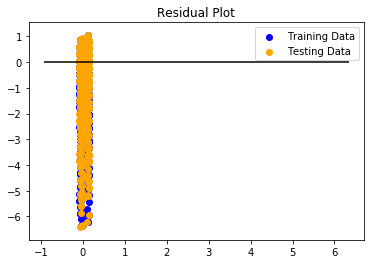

In [35]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION